<a href="https://colab.research.google.com/github/JGPB0/CS/blob/main/Lab6/CS_Lab6_ParedesJimmy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Environment Variable and Set-UID Program Lab

## Paredes Jimmy

## 1. Overview

## 2. Lab Tasks


### 1: Manipulating Environment Variables

* Use printenv or env command to print out the environment variables. If you are interested in some particular environment variables, such as PWD, you can use "printenv PWD" or "env | grep PWD".

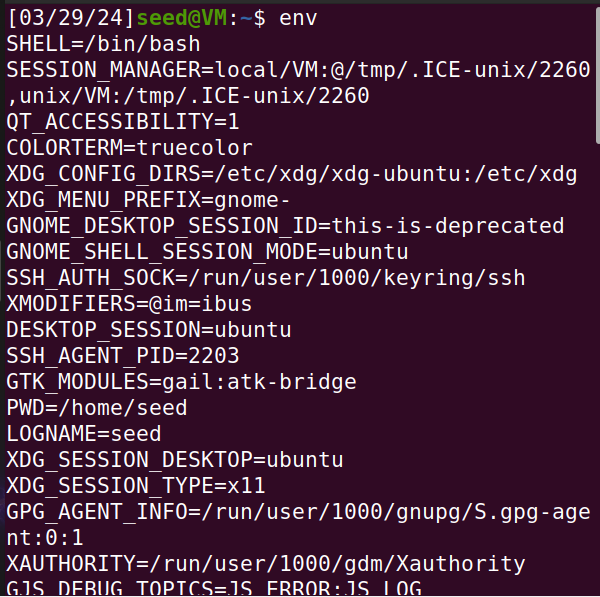


* Use export and unset to set or unset environment variables. It should be noted that these two commands are not separate programs; they are two of the Bash’s internal commands (you will not be able to find them outside of Bash).

### 2: Passing Environment Variables from Parent Process to Child Process

* Please compile and run the following program, and describe your observation. The program can be found in the Labsetup folder; it can be compiled using "gcc myprintenv.c", which will generate a binary called a.out. Let's run it and save the output into a file using "a.out > file".

* Now comment out the printenv() statement in the child process case (Line À), and uncomment the printenv() statement in the parent process case (Line Á). Compile and run the code again, and describe your observation. Save the output in another file.

* Compare the difference of these two files using the diff command. Please draw your conclusion.

Since the diff file file1 does not show anything, it means that both files created commenting different lines of code are the same and the same output is obtained.

## 3: Environment Variables and execve()

### 1. Please compile and run the following program, and describe your observation. This program simply executes a program called /usr/bin/env, which prints out the environment variables of the current process.

At this point running the executable file created after compiling the program does not show anything on the terminal.

### 2. Change the invocation of execve() in Line À to the following; describe your observation. execve("/usr/bin/env", argv, environ);

In this parte the result from running the executable file shows all te environment variables, it acts like directly calling to the env command.

### 3. Please draw your conclusion regarding how the new program gets its environment variables.

The new program can access to the environment variables because of the execve function in C which directly executes the command.

## 4: Environment Variables and system()

Compiling and runnig the code:
```
#include <stdio.h>
#include <stdlib.h>

int main(){
  system("/usr/bin/env");
  return 0 ;
}
```
The environment variables are listed on the terminal, but it is executed from /bin/sh.



## 5: Environment Variable and Set-UID Programs

* Write the following program that can print out all the environment variables in the current process
```
#include <stdio.h>
#include <stdlib.h>
extern char **environ;
int main()  {
  int i = 0;
  while (environ[i] != NULL) {
  printf("%s\n", environ[i]);
  i++;
  }
}
```
* Compile the above program, change its ownership to root, and make it a Set-UID program.

```
// Asssume the program’s name is foo
$ sudo chown root foo
$ sudo chmod 4755 foo
```

* In your shell (you need to be in a normal user account, not the root account), use the export
command to set the following environment variables (they may have already exist):

```
• PATH
• LD LIBRARY PATH
• ANY NAME (this is an environment variable defined by you, so pick whatever name you want).
```

In this point, executing the foo program, it returns all the environment variables, it even returns the environment variable rcreated above.




## 6: The PATH Environment Variable and Set-UID Programs


```
int main(){
  system("ls");
  return 0;
}
```
* Please compile the above program, change its owner to root, and make it a Set-UID program. Can you get this Set-UID program to run your own malicious code, instead of /bin/ls? If you can, is your malicious code running with the root privilege? Describe and explain your observations

Yes, it is possible by creating a file named "ls" and changing the path, so, when executing the code above it will usethe "ls" file recently created where our malicious code is. As the program is set as Set-UID, the program is indeed running with root privileges.


## 7: The LD PRELOAD Environment Variable and Set-UID Programs

### 1. First, we will see how these environment variables influence the behavior of dynamic loader/linker when running a normal program. Please follow these steps:

* Let us build a dynamic link library. Create the following program, and name it mylib.c. It basically overrides the sleep() function in libc:

```
#include <stdio.h>
void sleep (int s){
  /* If this is invoked by a privileged program,
  you can do damages here! */
  printf("I am not sleeping!\n");
}
```

* We can compile the above program using the following commands (in the -lc argument, the second character is `):
```
$ gcc -fPIC -g -c mylib.c
$ gcc -shared -o libmylib.so.1.0.1 mylib.o -lc
```

* Now, set the LD PRELOAD environment variable:
```
$ export LD_PRELOAD=./libmylib.so.1.0.1
```

* Finally, compile the following program myprog, and in the same directory as the above dynamic link library libmylib.so.1.0.1:
```
/* myprog.c */
#include <unistd.h>
int main(){
  sleep(1);
  return 0;
}
```

### 2. After you have done the above, please run myprog under the following conditions, and observe what happens.
* Make myprog a regular program, and run it as a normal user.

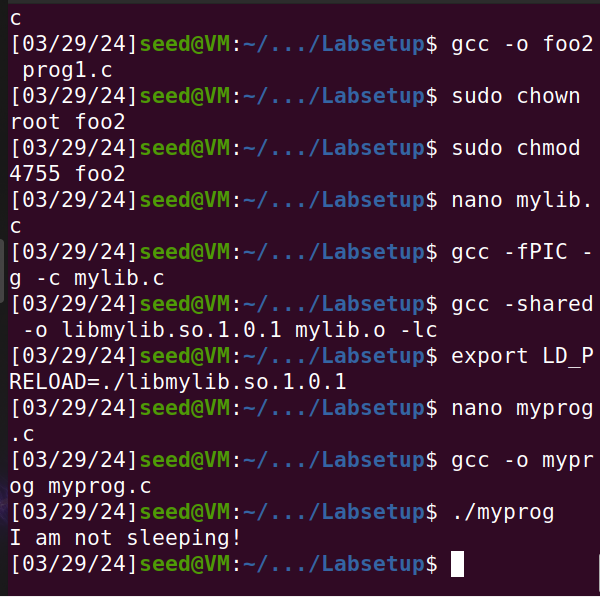




* Make myprog a Set-UID root program, and run it as a normal user.

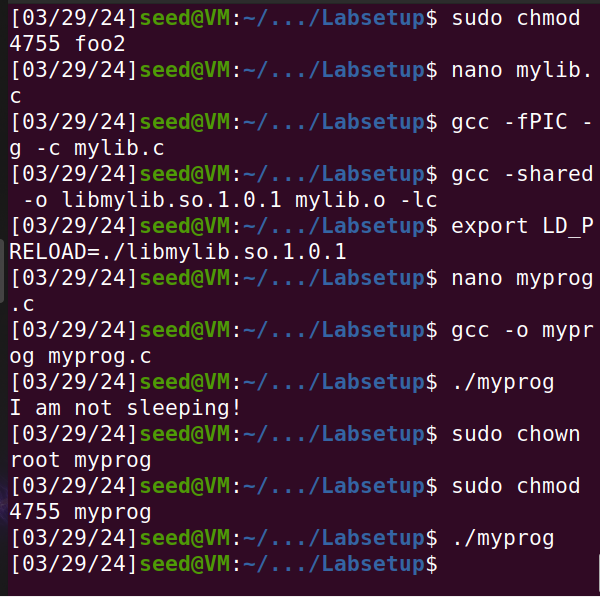

In this part, the program waits fot 1 second and then it returns normally.

* Make myprog a Set-UID root program, export the LD PRELOAD environment variable again in the root account and run it.

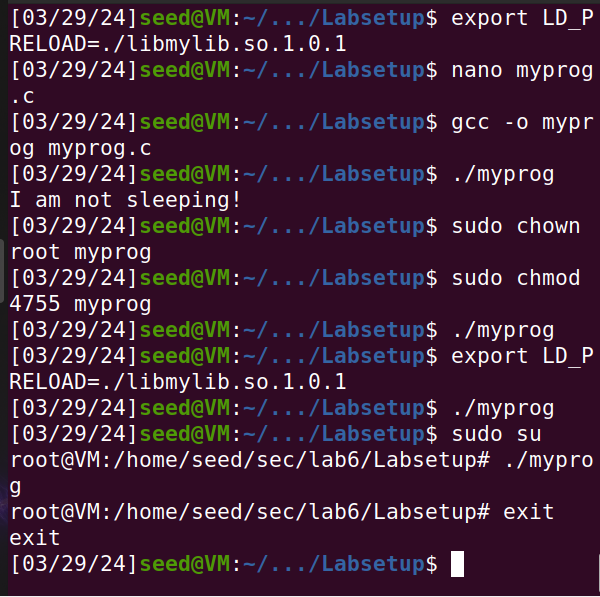

Running as a root happens the same, the prograns waits 1 second and then end its execution.


* Make myprog a Set-UID user1 program (i.e., the owner is user1, which is another user account), export the LD PRELOAD environment variable again in a different user’s account (not-root user) and run it.



### 3. You should be able to observe different behaviors in the scenarios described above, even though you are running the same program. You need to figure out what causes the difference. Environment variables play a role here. Please design an experiment to figure out the main causes, and explain why the behaviors in Step 2 are different. (Hint: the child process may not inherit the LD * environment variables).

## 8: Invoking External Programs Using system() versus execve()

### 1. Compile the above program, make it a root-owned Set-UID program. The program will use system() to invoke the command. If you were Bob, can you compromise the integrity of the system? For example, can you remove a file that is not writable to you?

Yes, it is possible because at this point the program is just asking for something to be sent as an inputm it can even be a file containing malicios code and since it is a root-owned Set-UID program, it means the program is running as a root. Thus everything passed to that program will be executed as root.

### 2. Comment out the system(command) statement, and uncomment the execve() statement; the program will use execve() to invoke the command. Compile the program, and make it a root-owned Set-UID. Do your attacks in Step 1 still work? Please describe and explain your observations.

No, the attack explained in step 2 does not work because it is taken all the input as data and no longer as code, it is a kind of protection to deal with the attack explained before.

## 9: Capability Leaking

* Compile the following program, change its owner to root, and make it a Set-UID program. Run the program as a normal user. Can you exploit the capability leaking vulnerability in this program? The goal is to write to the /etc/zzz file as a normal user.

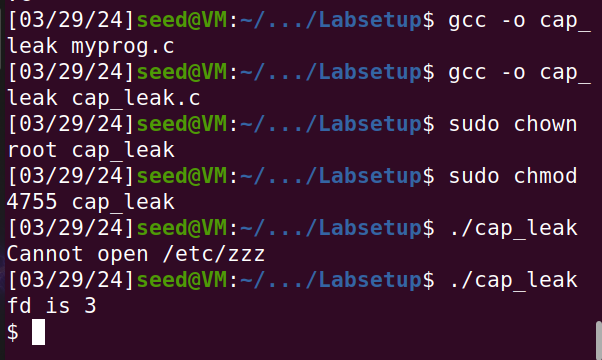

Yes, it is possible to exploit the capability leaking vulnerability and then modify the zzz file.